<a href="https://colab.research.google.com/github/janastadtruckerova/linear-regression/blob/main/line%C3%A1rna_regresia_predaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineárny regresný model

**Aký vplyv majú sociálne siete na zvýšenie predaja produktov?**

**Import potrebných knižníc**

In [ ]:
# Import knižníc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


**Preskúmanie datasetu**

In [ ]:
# načítanie datasetu
data = pd.read_csv("marketing_sales.csv")


In [ ]:
# Zobrazenie prvých päť riadkov
print(data.head())



       TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [ ]:
# Premenovanie stĺpca Social media
data.rename(columns={"Social Media": "Social_Media"}, inplace=True)

In [ ]:
print(data.isnull().sum())  # Zistí počet NaN v každom stĺpci

TV              1
Radio           1
Social_Media    0
Influencer      0
Sales           1
dtype: int64


In [ ]:
print(data['Social_Media'].nunique())  # Počet unikátnych hodnôt

572


In [ ]:
print(data.dtypes)  # Zistí dátové typy

TV               object
Radio           float64
Social_Media    float64
Influencer       object
Sales           float64
dtype: object


In [ ]:
print(data.shape)  # Počet riadkov a stĺpcov


(572, 5)


**Vizualizácia regresnej čiary - scatter plot predaje vs Socialne média**

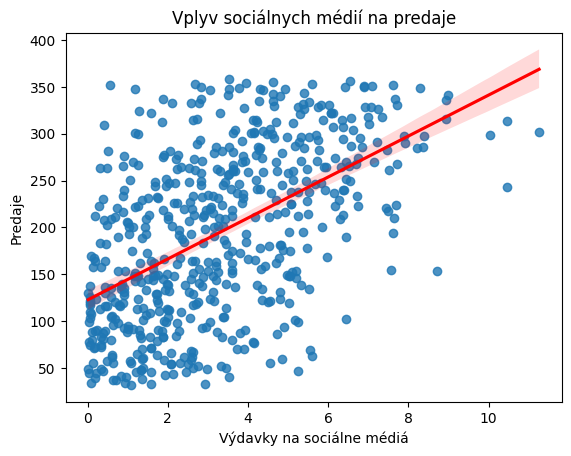

In [ ]:
# Vizualizácia regresnej čiary  a scatter plot of Sales vs Social Media

sns.regplot(x=data['Social_Media'], y=data['Sales'], line_kws={"color": "red"})
plt.xlabel('Výdavky na sociálne médiá')
plt.ylabel('Predaje')
plt.title('Vplyv sociálnych médií na predaje')
plt.show()


**Vytvorenie a natrénovanie modelu**

In [ ]:
# Vyberieme len číselné stĺpce, ktoré potrebujeme
data = data[['Social_Media', 'Sales']].dropna()

# Skontrolujeme, či máme správne dátové typy
data['Social_Media'] = pd.to_numeric(data['Social_Media'], errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

# Skontrolujeme, či ostali len numerické hodnoty
print(data.dtypes)

# spustíme regresný model
import statsmodels.api as sm

X = data['Social_Media']
y = data['Sales']

X = sm.add_constant(X)  # Pridáme intercept
model = sm.OLS(y, X).fit()

print(model.summary())


Social_Media    float64
Sales           float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     222.8
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           9.36e-43
Time:                        12:51:15   Log-Likelihood:                -3288.0
No. Observations:                 571   AIC:                             6580.
Df Residuals:                     569   BIC:                             6589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Výpočet reziduálov

In [ ]:
# Skutočné hodnoty
y_actual = data['Sales']

# Predikované hodnoty modelu
y_pred = model.fittedvalues

# Reziduály (chyby predikcie)
residuals = y_actual - y_pred

# Zobrazenie prvých 5 reziduálov
print(residuals.head())

0   -60.292360
1    94.178640
2   -21.141334
3    51.028932
4    62.618907
dtype: float64


V**iuálaizácia reziduálov - Histogram reziduálov**

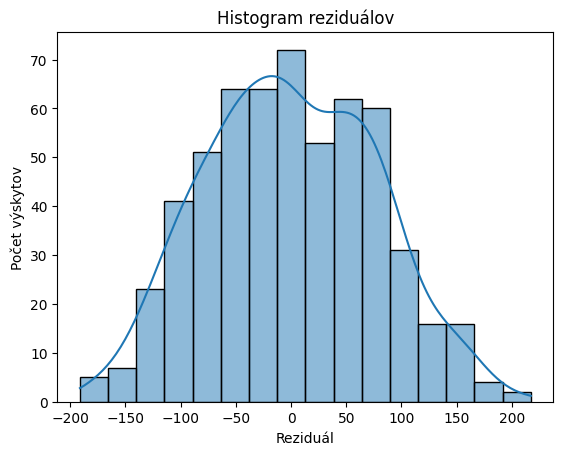

In [ ]:
sns.histplot(residuals, kde=True)
plt.xlabel("Reziduál")
plt.ylabel("Počet výskytov")
plt.title("Histogram reziduálov")
plt.show()

**Reziduálny graf**

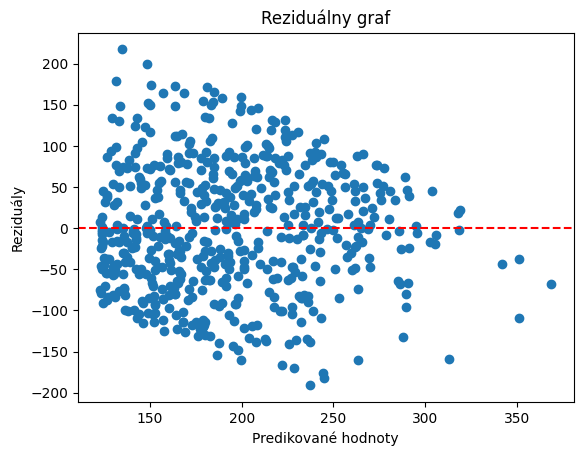

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Červená čiara na y=0
plt.xlabel("Predikované hodnoty")
plt.ylabel("Reziduály")
plt.title("Reziduálny graf")
plt.show()

Extrémne hodnoty

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print(outliers.sum())  # Počet outlierov v každom stĺpci


const           0
Social_Media    4
dtype: int64


In [ ]:
outlier_rows = X[outliers["Social_Media"]] # Konkrétne riadky

print(outlier_rows)



     const  Social_Media
15     1.0     11.260430
188    1.0     10.455109
197    1.0     10.453921
297    1.0     10.030244


**Model Robustnej regresi**e

In [ ]:
from statsmodels.robust.robust_linear_model import RLM
import statsmodels.api as sm
import pandas as pd
exog = sm.add_constant(data['Social_Media'])
model = RLM(data['Sales'], exog, M=sm.robust.norms.HuberT()).fit()
print(model.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:                  Sales   No. Observations:                  571
Model:                            RLM   Df Residuals:                      569
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 07 Mar 2025                                         
Time:                        13:05:49                                         
No. Iterations:                     8                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          118.2877      5.988     19.754   

**Reziduály**

In [ ]:
# Vypočítame reziduály
residuals = model.resid

# Vypočítame predikované hodnoty
predicted_values = model.fittedvalues

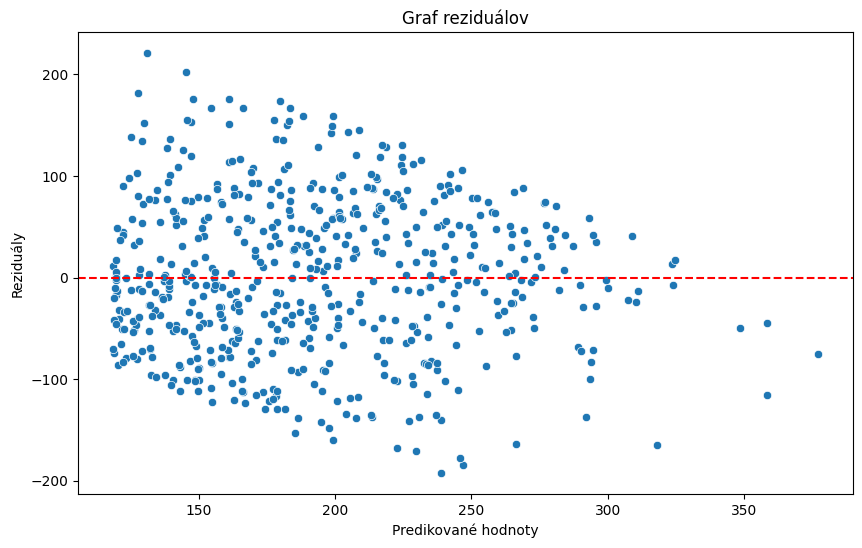

In [ ]:
# Vytvoríme graf reziduálov
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Pridáme horizontálnu čiaru na y=0
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.title('Graf reziduálov')
plt.show()


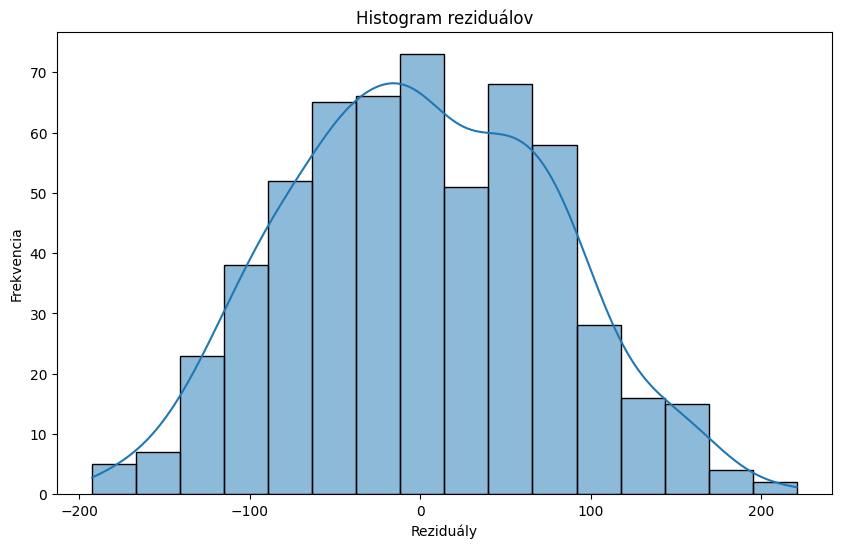

In [ ]:
# Vytvoríme histogram reziduálov
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # kde=True pridá odhad hustoty jadra
plt.xlabel('Reziduály')
plt.ylabel('Frekvencia')
plt.title('Histogram reziduálov')
plt.show()

Koeficien Socail_media
p-hodnota
R-squared

**Zhoidnotenie predpokladaov modelu**